### Academic honesty statement



**This is an exam problem. You are required to be in class to work on this. By turning this in you certify that it is your own work you did in class and you have not received any unauthorized assistance.**

Place your academic honesty statement here. Here are some acceptable examples.

-   I worked alone on this assignment.
-   I worked with <span class="underline"><span class="underline"><span class="underline"><span class="underline">\_\_</span></span></span></span> on this assignment.”
-   I received assistance from <span class="underline"><span class="underline"><span class="underline"><span class="underline">\_</span></span></span></span> on this assignment.



### Orthogonal distance regression



When we minimize the least-squared error in regression, this is equivalent to minimizing the vertical distance from the points to the model, and is relevant when we can assume there are no errors in the x data points; all the errors are in the y-values.

You are given this data:



In [1]:
import numpy as np
x = np.array([0.548, 0.92,  1.302, 1.65,  1.565])
y = np.array([4.888, 5.745, 6.33,  6.662, 6.402])

First, fit a line through this data with the usual way of minimizing the summed squared errors, e.g. with polyfit.



When there are also errors in the x-values, an approach known as `orthogonal distance regression` can be more relevant. Here we try to minimize the shortest distance from each point to the model. In the figure below, that means we want to find a line that minimizes the sum of $r_i^2$ for each data point from the line.

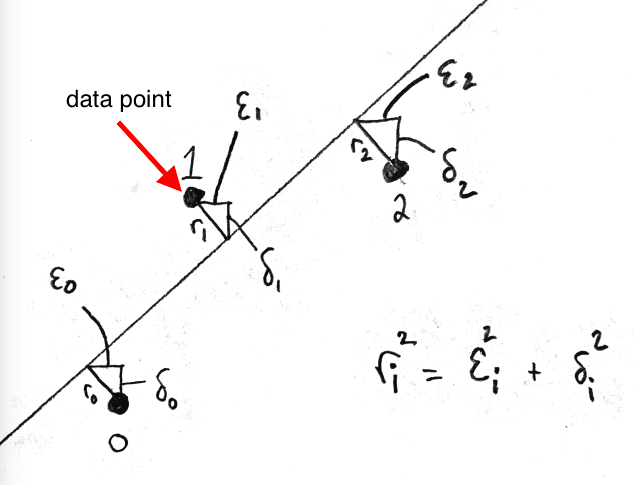

We can achieve this by introducing a new set of parameters: $\epsilon_i$ and $\delta_i$ for each data point. Then, we have a constrained optimization problem, which is to minimize $\sum_i r_i^2$ subject to $m * (x_i + \epsilon_i) + b = y_i + \delta_i$, where we let the equation of a line here be $y=m x + b$.

Here is an example objective function to be minimized. Use this to complete this regression problem to find the line that minimizes the orthogonal distance of each point to the line (this means find $m, b$ in the regression).



In [1]:
def objective(X):
    eps = X[0:5] # there are 5 data points
    delta = X[5:10]
    m, b = X[10:]  # m, b are the last two parameters
    return np.sum(eps**2 + delta**2)

Plot your fit from the linear least squares fit from the first part, and from the orthogonal distance regression from the second plot with the data.



### solution



As usual, we plot the data first to see it. We also plot the simple linear fit on this.



# Out [12]: 


# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

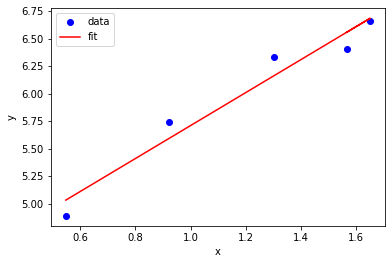

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x = np.array([0.548, 0.92,  1.302, 1.65,  1.565])
y = np.array([4.888, 5.745, 6.33,  6.662, 6.402])

p = np.polyfit(x, y, 1)
plt.plot(x, y, 'bo', label='data')
plt.plot(x, np.polyval(p, x), 'r-', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

To do the constrained optimization we set up the objective function and constraint. We need a guess for each eps and delta. It is not that important here what they are. A good way to estimate them is from the data and regular fit above. It is easy to get the delta guesses, just by subtracting the line from the data. The eps guesses are harder, so we just use the delta guesses. Finally we stack these with guesses for the slope and intercept.



In [1]:
def objective(X):
    eps = X[0:5]
    delta = X[5:10]
    return np.sum(eps**2 + delta**2)

def constraint(X):
    eps = X[0:5]
    delta = X[5:10]
    m, b = X[10:]
    return y - eps - (m * (x + delta) + b)

delta_guess = np.abs(y - np.polyval(p, x))
eps_guess = delta_guess

guess = np.hstack([delta_guess, eps_guess, [1, 1]])

from scipy.optimize import minimize

sol = minimize(objective, guess, constraints={'type': 'eq', 'fun': constraint})
sol

# Out [14]: 
# text/plain
     fun: 0.02922240444909477
     jac: array([-0.06389624,  0.09966822,  0.0946753 , -0.0279617 , -0.10269609,
       -0.0990148 ,  0.15471807,  0.14684698, -0.04293787, -0.15947436,
        0.        ,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 183
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([-0.03194813,  0.0498341 ,  0.04733764, -0.01398086, -0.05134805,
       -0.04950741,  0.07735903,  0.07342348, -0.02146894, -0.07973719,
        1.55395826,  4.14531161])

Finally we plot the solution.



# Out [16]: 
# output
1.5539582615515957 4.145311611033365
[1.50048612 4.20931812]

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

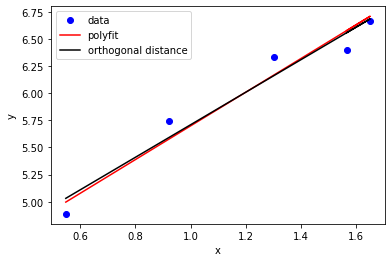

In [1]:
plt.plot(x, y, 'bo')
m, b = sol.x[10:]  # extract out m, b from the parameters we solved for.
plt.plot(x, m * x + b, 'r-')
print(m, b)

p = np.polyfit(x, y, 1)
plt.plot(x, np.polyval(p, x), 'k-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data', 'polyfit', 'orthogonal distance'])
print(p)

These two fits are not that different in this case.

